In [155]:
#Importing the packages
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression

In [156]:
df = pd.read_csv('C:/Users/Sabbella/Desktop/University of Pittsburgh/Backorders - supply chain/Kaggle_Training_Dataset_v2.csv')
df

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,No
1,1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.99,0.99,0.0,No,No,No,Yes,No,No
2,1043696,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
3,1043852,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.10,0.13,0.0,No,No,No,Yes,No,No
4,1044048,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1687856,1373987,-1.0,NaN,0.0,5.0,7.0,9.0,1.0,3.0,3.0,...,0.0,-99.00,-99.00,1.0,No,No,No,Yes,No,No
1687857,1524346,-1.0,9.0,0.0,7.0,9.0,11.0,0.0,8.0,11.0,...,0.0,0.86,0.84,1.0,Yes,No,No,No,No,Yes
1687858,1439563,62.0,9.0,16.0,39.0,87.0,126.0,35.0,63.0,153.0,...,0.0,0.86,0.84,6.0,No,No,No,Yes,No,No
1687859,1502009,19.0,4.0,0.0,0.0,0.0,0.0,2.0,7.0,12.0,...,0.0,0.73,0.78,1.0,No,No,No,Yes,No,No


In [157]:
print("df shape:",df.shape)

df shape: (1687861, 23)


In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1687861 entries, 0 to 1687860
Data columns (total 23 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   sku                1687861 non-null  object 
 1   national_inv       1687860 non-null  float64
 2   lead_time          1586967 non-null  float64
 3   in_transit_qty     1687860 non-null  float64
 4   forecast_3_month   1687860 non-null  float64
 5   forecast_6_month   1687860 non-null  float64
 6   forecast_9_month   1687860 non-null  float64
 7   sales_1_month      1687860 non-null  float64
 8   sales_3_month      1687860 non-null  float64
 9   sales_6_month      1687860 non-null  float64
 10  sales_9_month      1687860 non-null  float64
 11  min_bank           1687860 non-null  float64
 12  potential_issue    1687860 non-null  object 
 13  pieces_past_due    1687860 non-null  float64
 14  perf_6_month_avg   1687860 non-null  float64
 15  perf_12_month_avg  1687860 non-n

In [159]:
new_column_names = ['product_id', 'current_inventory', 'transit_duration', 'transit_quantity',
                   'forecast_sales_3_months', 'forecast_sales_6_months', 'forecast_sales_9_months',
                   'prior_sales_1_month', 'prior_sales_3_month', 'prior_sales_6_month',
                   'prior_sales_9_month', 'minimum_recommend_stock', 'source_has_issue',
                   'source_overdue', 'source_performance_6_months', 'source_performance_12_months',
                   'stock_overdue', 'deck_risk', 'oe_constraint', 'ppap_risk', 'stop_auto_buy',
                   'rev_stop', 'went_on_backorder']

df.columns = new_column_names

In [160]:
df.describe()

,current_inventory,transit_duration,transit_quantity,forecast_sales_3_months,forecast_sales_6_months,forecast_sales_9_months,prior_sales_1_month,prior_sales_3_month,prior_sales_6_month,prior_sales_9_month,minimum_recommend_stock,source_overdue,source_performance_6_months,source_performance_12_months,stock_overdue
count,1.687860e+06,1.586967e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06
mean,4.961118e+02,7.872267e+00,4.405202e+01,1.781193e+02,3.449867e+02,5.063644e+02,5.592607e+01,1.750259e+02,3.417288e+02,5.252697e+02,5.277230e+01,2.043724e+00,-6.872059e+00,-6.437947e+00,6.264507e-01
std,2.961523e+04,7.056024e+00,1.342742e+03,5.026553e+03,9.795152e+03,1.437892e+04,1.928196e+03,5.192378e+03,9.613167e+03,1.483861e+04,1.254983e+03,2.360165e+02,2.655636e+01,2.584333e+01,3.372224e+01
min,-2.725600e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-9.900000e+01,-9.900000e+01,0.000000e+00
25%,4.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.300000e-01,6.600000e-01,0.000000e+00
50%,1.500000e+01,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,8.200000e-01,8.100000e-01,0.000000e+00
75%,8.000000e+01,9.000000e+00,0.000000e+00,4.000000e+00,1.200000e+01,2.000000e+01,4.000000e+00,1.500000e+01,3.100000e+01,4.700000e+01,3.000000e+00,0.000000e+00,9.700000e-01,9.500000e-01,0.000000e+00
max,1.233440e+07,5.200000e+01,4.894080e+05,1.427612e+06,2.461360e+06,3.777304e+06,7.417740e+05,1.105478e+06,2.146625e+06,3.205172e+06,3.133190e+05,1.464960e+05,1.000000e+00,1.000000e+00,1.253000e+04


In [161]:
df.describe(include = ['object'])
# Good to see that there are only 2 unique values for all catogorical (object data type) columns.

,product_id,source_has_issue,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
count,1687861,1687860,1687860,1687860,1687860,1687860,1687860,1687860
unique,1687861,2,2,2,2,2,2,2
top,3273854,No,No,No,No,Yes,No,No
freq,1,1686953,1300377,1687615,1484026,1626774,1687129,1676567


In [162]:
df.isnull().sum()

product_id                           0
current_inventory                    1
transit_duration                100894
transit_quantity                     1
forecast_sales_3_months              1
forecast_sales_6_months              1
forecast_sales_9_months              1
prior_sales_1_month                  1
prior_sales_3_month                  1
prior_sales_6_month                  1
prior_sales_9_month                  1
minimum_recommend_stock              1
source_has_issue                     1
source_overdue                       1
source_performance_6_months          1
source_performance_12_months         1
stock_overdue                        1
deck_risk                            1
oe_constraint                        1
ppap_risk                            1
stop_auto_buy                        1
rev_stop                             1
went_on_backorder                    1
dtype: int64

Most of the columns have just one entry as null. Quite possible that all these NaN belong to same row.
If we remove this row it will also solve the mix datatypes issue which we saw during data load.

There are nulls and lots of 0's in each column. During the EDA/Feature engineering step we can determine if we want to omit
or keep this column. But for now we will look for an approach to fill these missing values

In [163]:
df[df.current_inventory.isnull()]

,product_id,current_inventory,transit_duration,transit_quantity,forecast_sales_3_months,forecast_sales_6_months,forecast_sales_9_months,prior_sales_1_month,prior_sales_3_month,prior_sales_6_month,...,source_overdue,source_performance_6_months,source_performance_12_months,stock_overdue,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
1687860,(1687860 rows),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [164]:
df.drop([1687860], inplace = True)

In [165]:
# There no longer is any column with missing data except that of "transit_duration"
df.isnull().sum()

product_id                           0
current_inventory                    0
transit_duration                100893
transit_quantity                     0
forecast_sales_3_months              0
forecast_sales_6_months              0
forecast_sales_9_months              0
prior_sales_1_month                  0
prior_sales_3_month                  0
prior_sales_6_month                  0
prior_sales_9_month                  0
minimum_recommend_stock              0
source_has_issue                     0
source_overdue                       0
source_performance_6_months          0
source_performance_12_months         0
stock_overdue                        0
deck_risk                            0
oe_constraint                        0
ppap_risk                            0
stop_auto_buy                        0
rev_stop                             0
went_on_backorder                    0
dtype: int64

In [166]:
df.product_id = df.product_id.astype(int)

In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1687860 entries, 0 to 1687859
Data columns (total 23 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   product_id                    1687860 non-null  int32  
 1   current_inventory             1687860 non-null  float64
 2   transit_duration              1586967 non-null  float64
 3   transit_quantity              1687860 non-null  float64
 4   forecast_sales_3_months       1687860 non-null  float64
 5   forecast_sales_6_months       1687860 non-null  float64
 6   forecast_sales_9_months       1687860 non-null  float64
 7   prior_sales_1_month           1687860 non-null  float64
 8   prior_sales_3_month           1687860 non-null  float64
 9   prior_sales_6_month           1687860 non-null  float64
 10  prior_sales_9_month           1687860 non-null  float64
 11  minimum_recommend_stock       1687860 non-null  float64
 12  source_has_issue            

# Handling NAN and Missing Values

The following are the observations made in the dataset:

    1. "transit_duration" has 100893 null values which is 6% of the total data.
    2. Missing values in columns source_performance_6_months and source_performance_12_months are represented with '-99'.
    3. "source_performance_6_months" has 129478 null values which is 8% of the total data.
    4. "source_performance_12_months" has 122050 null values which is 8% of the total data.
    5. Heatmap shows a strong coorelation (0.97) between "source_performance_6_months" and "source_performance_12_months".

In [64]:
# Percentage of "Transit duration" data missing = 6%

100893*100/len(df.index)

5.9775692296754475

In [68]:
# Total missing values of "source_performance_6_months"

print(len(df[df['source_performance_6_months']==-99]))

# Percent of missing values

print(len(df[df['source_performance_6_months']==-99])*100/len(df.index))

129478
7.671133861813184


In [71]:
# Total missing values of "source_performance_12_months"

print(len(df[df['source_performance_12_months']==-99]))

# Percent of missing values

print(len(df[df['source_performance_12_months']==-99])*100/len(df.index))

122050
7.231049968599291


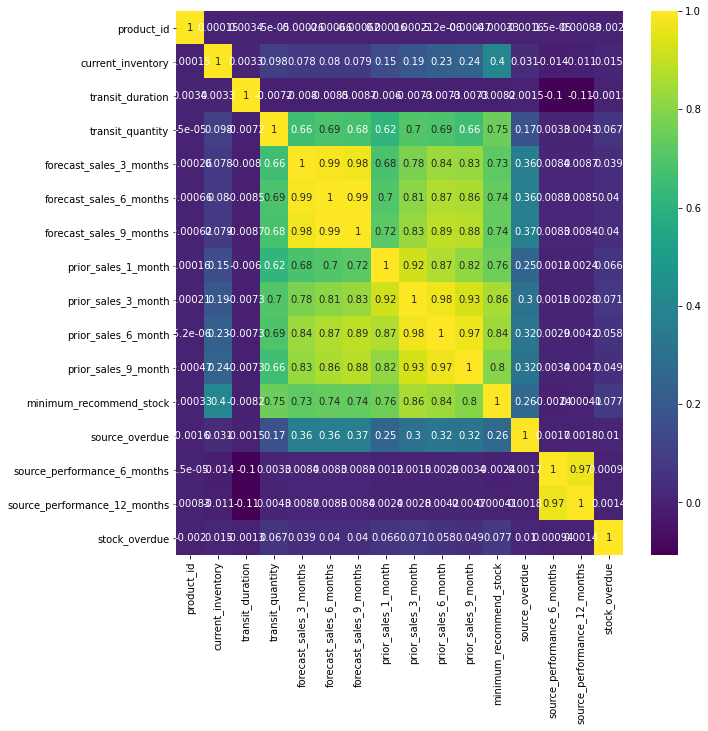

In [172]:
#finding the correlations
fig = plt.subplots(figsize=(10, 10))
col_corr = df.corr()
ax = sns.heatmap(col_corr, annot = True,cmap='viridis')
plt.show('Heatmap of Correlation Matrix')

ax.figure.savefig('corr.png', dpi=500,bbox_inches='tight')

C:\Users\sabbe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Transit Duration Range and Distribution')]

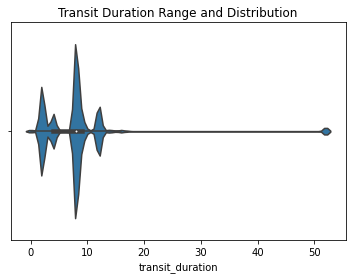

In [170]:
#View the range and distribution through the violinplots
sns.violinplot(df.transit_duration).set(title='Transit Duration Range and Distribution')

In [75]:
#Fill the null values with median
df['transit_duration'] = df['transit_duration'].fillna(df['transit_duration'].median())
df['transit_duration'].isnull().sum()

0

In [77]:
#checking for the duplicates in the product_id field
df['product_id'].duplicated().sum()

0

Given that we do have cells with -99 in the sourec_performance_12_months and source_performance_6_months of  masterData, 
we need to comeup with a feature engineering technique appropriately to replace these values with most desirable one's. 
Heat map strongly indicates that there is strong relationship correlationship between these two. Hence, we can use the linear
regression to estimate the missing values. However, there are quiet a lot missing values, it is strongly encouraged to
replace the missing values with the alternate approach. In this case, we are trying to replace the missing values with the
median of their respective fields

In [79]:
#Replace -99 with NAN in the source_performance_12_months and source_performance_6_months of df set
df['source_performance_12_months'].replace({-99.00:np.nan}, inplace = True)
df['source_performance_6_months'].replace({-99.00:np.nan}, inplace = True)

In [81]:
(df['source_performance_12_months']==-99.00).sum()

0

In [82]:
(df['source_performance_6_months']==-99.00).sum()

0

In [84]:
#Linear regression for fillin the NAN's
x_12months = df[df.source_performance_6_months.notnull() 
                        & df.source_performance_12_months.notnull()][['source_performance_12_months']]
y_6months = df[df.source_performance_6_months.notnull() 
                       & df.source_performance_12_months.notnull()][['source_performance_6_months']]

In [85]:
linReg = LinearRegression()
linReg.fit(x_12months,y_6months)

LinearRegression()

In [86]:
#Predicted NAN values
test_12months = df[df['source_performance_6_months'].isnull() 
                           & df['source_performance_12_months'].notnull()][['source_performance_12_months']]
pred_6months = linReg.predict(test_12months)


In [87]:
#Fill the null values
reg_6_months_list = list(zip(test_12months.index, pred_6months)) 

In [90]:
for val in reg_6_months_list:
      #print(val[0], val[1])
      #df.set_value(index=val[0], value =val[1], col='source_performance_6_months')
      df.loc[val[0], 'source_performance_6_months'] = float(str(val[1])[1:-1])


In [92]:
#check if the value is inserted
df.source_performance_6_months.isnull().sum()

122050

C:\Users\sabbe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Source Performance Range and Distribution')]

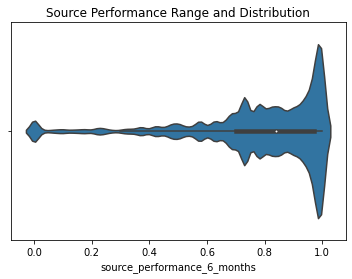

In [93]:
#View range and distribution through violin chart
sns.violinplot(df.source_performance_6_months).set(title='Source Performance Range and Distribution')
#sns.plt.title('Transit Duration Range and Distribution')

In [94]:
#Imputing the missing values in the source_performance_6_months field with the median values
df.source_performance_6_months.fillna(df.source_performance_6_months.median(), inplace = True)

In [96]:
df.source_performance_6_months.isnull().sum()

0

C:\Users\sabbe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Source Performance of 12 months Range and Distribution')]

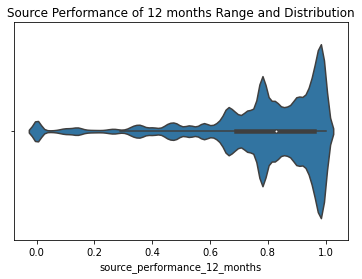

In [98]:
#View range and distribution of the source_performance_12_months
sns.violinplot(df.source_performance_12_months).set(title='Source Performance of 12 months Range and Distribution')

In [99]:
#imputing the null values with the median values
df.source_performance_12_months.fillna(df.source_performance_12_months.median(), inplace = True)

In [101]:
df.source_performance_12_months.isnull().sum()

0

# Handling the Repetitive values

It can be seen that there are 0's in our masterData.Lets find out the percentage of repeatitions of 0's. If any of the 
columns has more than the 60%, we can safely drop that column. This kind of data trend canbe viewed on violin plot

C:\Users\sabbe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'forecast sales of 3 months')]

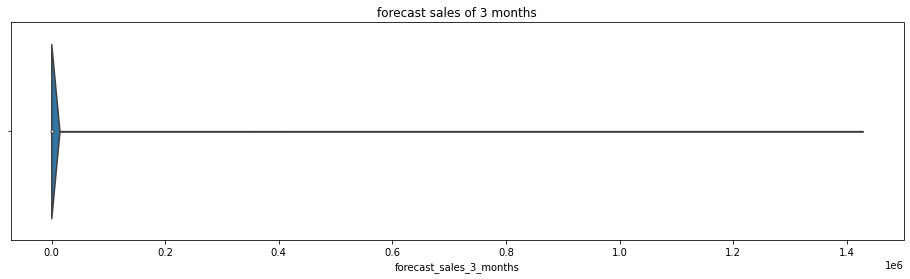

In [110]:
plt.figure(figsize=(16,4))
sns.violinplot(df.forecast_sales_3_months).set(title='forecast sales of 3 months')


C:\Users\sabbe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'forecast sales of 6 months')]

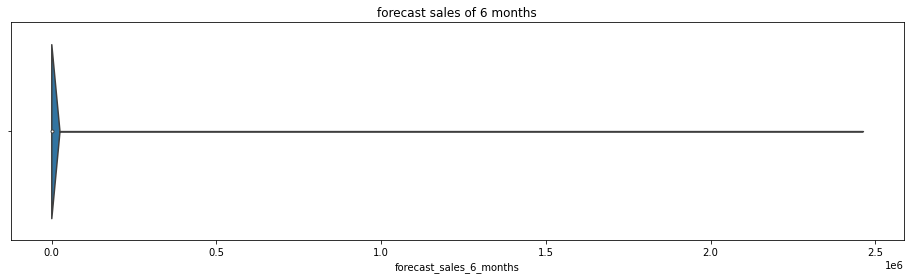

In [112]:
plt.figure(figsize=(16,4))
sns.violinplot(df.forecast_sales_6_months).set(title='forecast sales of 6 months')

In [114]:
#Calculating the percentage of repeatitions of 0's in each column
perct_0 = {column: '%2.2f' %(((df[column] == 0).sum()/df.shape[0])*100)+'%' for column in df.columns
                             if df[column].dtype == np.float64}

In [115]:
perct_0

{'current_inventory': '6.42%',
 'transit_duration': '0.62%',
 'transit_quantity': '79.67%',
 'forecast_sales_3_months': '69.78%',
 'forecast_sales_6_months': '64.23%',
 'forecast_sales_9_months': '61.22%',
 'prior_sales_1_month': '56.87%',
 'prior_sales_3_month': '44.98%',
 'prior_sales_6_month': '38.33%',
 'prior_sales_9_month': '34.72%',
 'minimum_recommend_stock': '51.68%',
 'source_overdue': '98.50%',
 'source_performance_6_months': '2.31%',
 'source_performance_12_months': '1.95%',
 'stock_overdue': '98.62%'}

In [117]:
#Dropping the columns with the percentage of 0's more than 60%
df = df.drop(['transit_quantity', 'forecast_sales_3_months', 'forecast_sales_6_months',
                             'forecast_sales_9_months', 'source_overdue', 'stock_overdue'], axis = 1)

In [119]:
df.shape

(1687860, 17)

# Handling the outliers

C:\Users\sabbe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sabbe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sabbe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sabbe\anaconda3\lib\si

<AxesSubplot:xlabel='source_performance_12_months'>

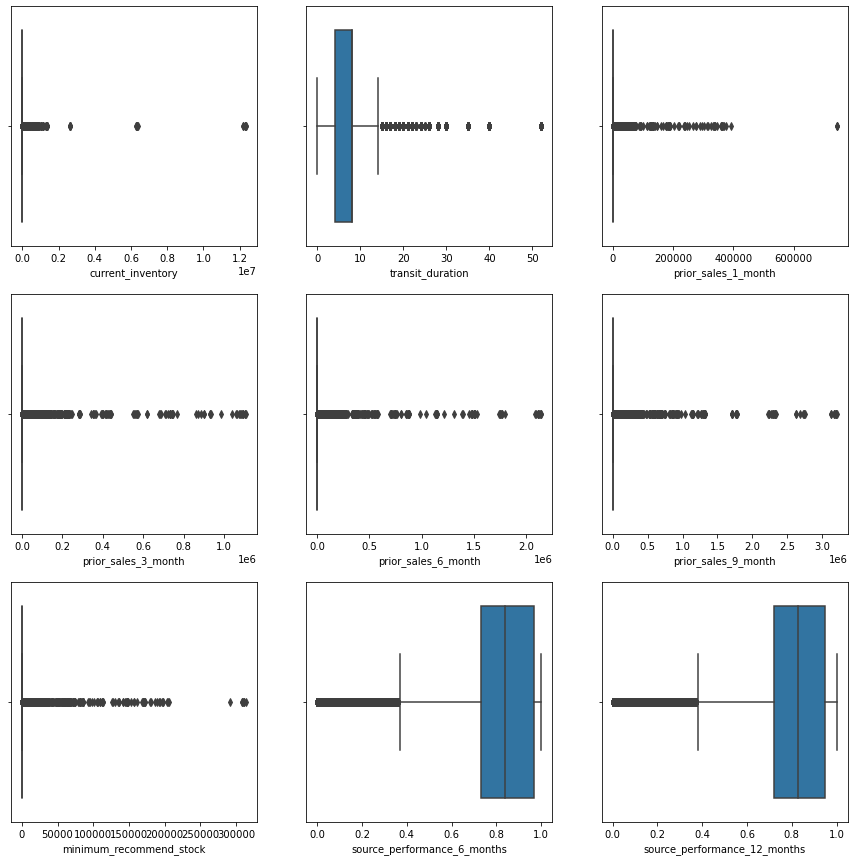

In [121]:
nrows = 3
ncols = 3
fig, ax1 = plt.subplots(nrows, ncols, figsize = (15, 15))
sns.boxplot(df.current_inventory, ax = ax1[0,0])
sns.boxplot(df.transit_duration, ax = ax1[0,1])
sns.boxplot(df.prior_sales_1_month, ax = ax1[0,2])
sns.boxplot(df.prior_sales_3_month, ax = ax1[1,0])
sns.boxplot(df.prior_sales_6_month, ax = ax1[1,1])
sns.boxplot(df.prior_sales_9_month, ax = ax1[1,2])
sns.boxplot(df.minimum_recommend_stock, ax = ax1[2,0])
sns.boxplot(df.source_performance_6_months, ax = ax1[2,1])
sns.boxplot(df.source_performance_12_months, ax = ax1[2,2])

In [122]:
def get_outlier_boundaries(column):
    q75, q25 =  np.percentile(column, [75, 25])
    iqr = q75 - q25
    lower = q25 - 1.5*iqr
    upper = q75 + 1.5*iqr
    return lower,upper

In [124]:
transit_duration_upper = get_outlier_boundaries(df.transit_duration)[1]
transit_duration_lower = get_outlier_boundaries(df.transit_duration)[0]
print(transit_duration_upper, transit_duration_lower)
outlier_transit_duration = df[df.transit_duration > transit_duration_upper]
#print(outlier_transit_duration.shape)
outlier_transit_duration.went_on_backorder.value_counts()

14.0 -2.0


No     47993
Yes      105
Name: went_on_backorder, dtype: int64

C:\Users\sabbe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


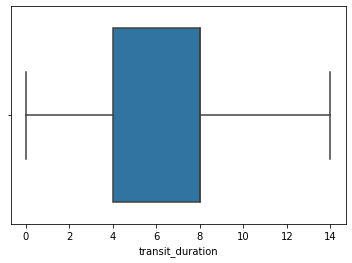

In [125]:
df = df.drop(outlier_transit_duration.index)
cleaned_ = sns.boxplot(df.transit_duration)

C:\Users\sabbe\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='transit_duration', ylabel='Density'>

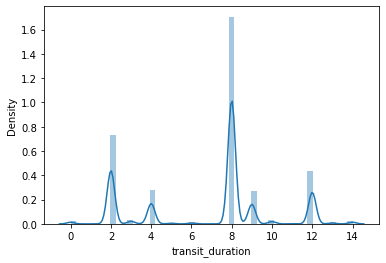

In [127]:
sns.distplot(df.transit_duration)

In [128]:
#dropping outliers of minimum recommended stock
outlier_minimum_recommended_stock = df[df.minimum_recommend_stock > 250000]
outlier_minimum_recommended_stock.shape
#print(outlier_minimum_recommended_stock)

(7, 17)

In [130]:
#lets delete the outlier of the minimum_recommend_stock
df = df.drop(outlier_minimum_recommended_stock.index, errors = 'ignore')

In [131]:
outlier_current_inventory = df[df.current_inventory > .2e07]
outlier_current_inventory.shape
#since the count is low, we can drop these records
df = df.drop(outlier_current_inventory.index, errors = 'ignore')

In [132]:
df.to_csv('Backorder.csv', index = False)